In [ ]:
#working code
#it's tested on qiskit 1.2.4

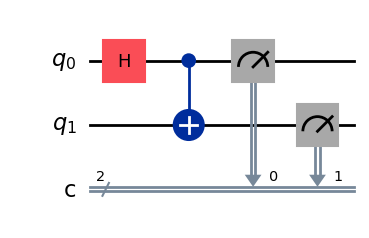

In [17]:
from qiskit import QuantumCircuit , transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from dataclasses import asdict
from qiskit_ibm_runtime import SamplerV2 as Sampler

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [18]:
#QiskitRuntimeService.save_account(channel="ibm_quantum",
#                                  token='____your_token______')

service = QiskitRuntimeService(channel='ibm_quantum')
#service.backends()

backend = service.least_busy(operational=True,
                             simulator=False,min_num_qubits=2)
backend

<IBMBackend('ibm_brisbane')>

In [19]:
sampler = Sampler(backend, options={"default_shots": 1024})

In [20]:

ghz = transpile(ghz, backend)

In [21]:
ghz.draw()

global phase: π/4
                                                                    »
    q_0 -> 0 ───────────────────────────────────────────────────────»
                                                                    »
    q_1 -> 1 ───────────────────────────────────────────────────────»
                                                                    »
    q_2 -> 2 ───────────────────────────────────────────────────────»
                                                                    »
    q_3 -> 3 ───────────────────────────────────────────────────────»
                                                                    »
    q_4 -> 4 ───────────────────────────────────────────────────────»
                                                                    »
    q_5 -> 5 ───────────────────────────────────────────────────────»
                                                                    »
    q_6 -> 6 ───────────────────────────────────────────────────────»
                                                                    »
    q_7 -> 7 ───────────────────────────────────────────────────────»
                                                                    »
    q_8 -> 8 ───────────────────────────────────────────────────────»
                                                                    »
    q_9 -> 9 ───────────────────────────────────────────────────────»
                                                                    »
  q_10 -> 10 ───────────────────────────────────────────────────────»
                                                                    »
  q_11 -> 11 ───────────────────────────────────────────────────────»
                                                                    »
  q_12 -> 12 ───────────────────────────────────────────────────────»
                                                                    »
  q_13 -> 13 ───────────────────────────────────────────────────────»
                                                                    »
  q_14 -> 14 ───────────────────────────────────────────────────────»
                                                                    »
  q_15 -> 15 ───────────────────────────────────────────────────────»
                                                                    »
  q_16 -> 16 ───────────────────────────────────────────────────────»
                                                                    »
  q_17 -> 17 ───────────────────────────────────────────────────────»
                                                                    »
  q_18 -> 18 ───────────────────────────────────────────────────────»
                                                                    »
  q_19 -> 19 ───────────────────────────────────────────────────────»
                                                                    »
  q_20 -> 20 ───────────────────────────────────────────────────────»
                                                                    »
  q_21 -> 21 ───────────────────────────────────────────────────────»
                                                                    »
  q_22 -> 22 ───────────────────────────────────────────────────────»
                                                                    »
  q_23 -> 23 ───────────────────────────────────────────────────────»
                                                                    »
  q_24 -> 24 ───────────────────────────────────────────────────────»
                                                                    »
  q_25 -> 25 ───────────────────────────────────────────────────────»
                                                                    »
  q_26 -> 26 ───────────────────────────────────────────────────────»
                                                                    »
  q_27 -> 27 ───────────────────────────────────────────────────────»
                                                              

In [22]:
job = sampler.run([ghz], shots=1024)

#use defeault options...

In [30]:
print(job.status())

DONE


In [34]:
print(job.job_id())


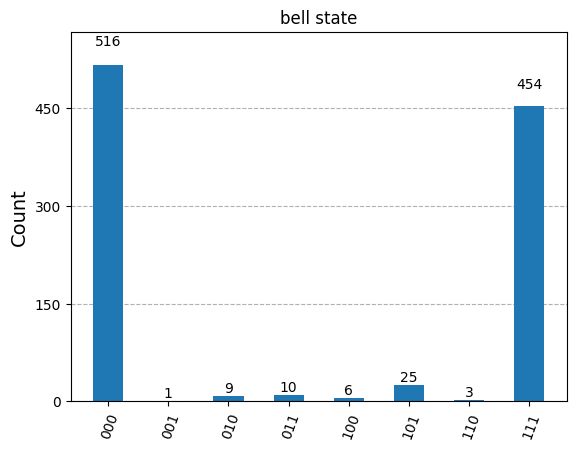

In [29]:
from qiskit.visualization import plot_histogram
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts,title='bell state'  )